In [ ]:
pip install pyarrow

In [ ]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
csv_file = '/content/drive/MyDrive/ranked_customer.csv'
ceva = pd.read_csv(csv_file)
ceva.head(5)

,Unnamed: 0,number_of_delay_days,number_of_ontime_days,delayed_invoices_amount,ontime_invoices_amount,number_of_delayed_invoices,number_of_ontime_invoices,collateral_invoice_difference,average_collateral,number_of_invoices,average_number_of_delay_days,total_purchase,average_ontime_amount,average_delayed_amount,on-time rate,delay balance ratio,rank,customer_id
0,0,0.008316,0.0,0.003616,0.002628,0.009234,0.009235,0.000096,0.002151,0.009115,0.451,0.003529,0.07,0.93,0.09,0.93,4,413046
1,1,0.073260,0.0,0.020855,0.020138,0.071231,0.052770,0.000054,0.001992,0.069441,0.527,0.020791,0.09,0.91,0.07,0.91,4,419280
2,2,0.124664,0.0,0.023737,0.022973,0.121620,0.106860,0.000067,0.001999,0.120173,0.519,0.023669,0.09,0.91,0.08,0.91,4,421072
3,3,0.001174,0.0,0.000589,0.000166,0.001187,0.001319,0.000218,0.002100,0.001079,0.490,0.000551,0.03,0.97,0.10,0.97,4,421424
4,4,0.091641,0.0,0.015858,0.035542,0.091149,0.096306,0.000036,0.001988,0.091509,0.501,0.017587,0.18,0.82,0.10,0.82,4,424282


In [ ]:
column_types=ceva.dtypes
print(column_types)

Unnamed: 0                         int64
number_of_delay_days             float64
number_of_ontime_days            float64
delayed_invoices_amount          float64
ontime_invoices_amount           float64
number_of_delayed_invoices       float64
number_of_ontime_invoices        float64
collateral_invoice_difference    float64
average_collateral               float64
number_of_invoices               float64
average_number_of_delay_days     float64
total_purchase                   float64
average_ontime_amount            float64
average_delayed_amount           float64
on-time rate                     float64
delay balance ratio              float64
rank                               int64
customer_id                        int64
dtype: object


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming 'calculated_data_scaled' is your DataFrame with the scaled features

# Remove any rows with missing values
ceva.dropna(inplace=True)

# Choose the number of clusters for K-Means
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
ceva['KMeans_Cluster'] = kmeans.fit_predict(ceva[['on-time rate', 'delay balance ratio']])

# Print the results|
print("K-Means Clusters:")
print(ceva.groupby('KMeans_Cluster').size())


K-Means Clusters:
KMeans_Cluster
0    260
1     30
2     57
3    608
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


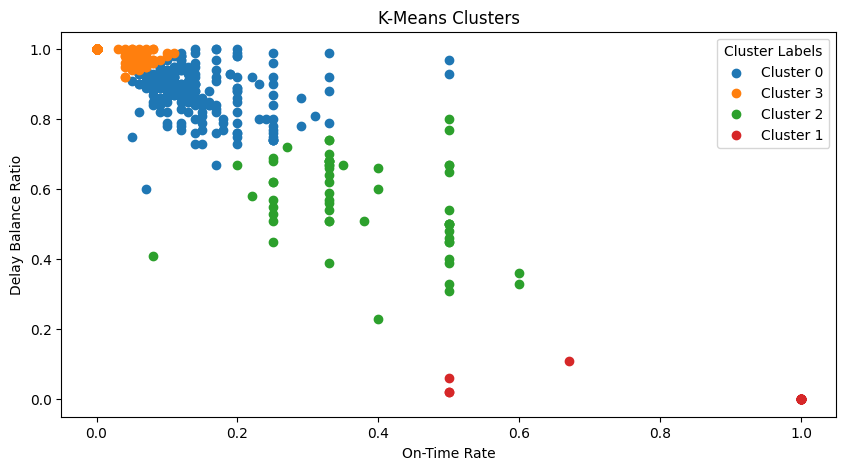

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 5))

# Plot each cluster separately and label them
for cluster_label in ceva['KMeans_Cluster'].unique():
    cluster_data = ceva[ceva['KMeans_Cluster'] == cluster_label]
    plt.scatter(cluster_data['on-time rate'], cluster_data['delay balance ratio'], label=f'Cluster {cluster_label}')

plt.title('K-Means Clusters')
plt.xlabel('On-Time Rate')
plt.ylabel('Delay Balance Ratio')
plt.legend(title='Cluster Labels')

plt.show()

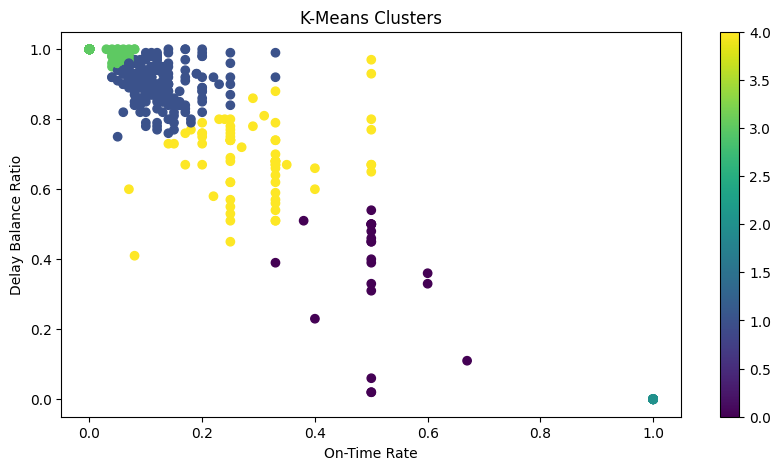

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for K-Means clusters
plt.figure(figsize=(10, 5))
plt.scatter(ceva['on-time rate'], ceva['delay balance ratio'], c=ceva['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clusters')
plt.xlabel('On-Time Rate')
plt.ylabel('Delay Balance Ratio')
plt.colorbar()
plt.show()


In [ ]:

ceva['KMeans_Cluster'] = ceva['KMeans_Cluster']



In [ ]:
ceva.head()

,Unnamed: 0,number_of_delay_days,number_of_ontime_days,delayed_invoices_amount,ontime_invoices_amount,number_of_delayed_invoices,number_of_ontime_invoices,collateral_invoice_difference,average_collateral,number_of_invoices,average_number_of_delay_days,total_purchase,average_ontime_amount,average_delayed_amount,on-time rate,delay balance ratio,rank,customer_id,KMeans_Cluster
0,0,0.008316,0.0,0.003616,0.002628,0.009234,0.009235,0.000096,0.002151,0.009115,0.451,0.003529,0.07,0.93,0.09,0.93,4,413046,1
1,1,0.073260,0.0,0.020855,0.020138,0.071231,0.052770,0.000054,0.001992,0.069441,0.527,0.020791,0.09,0.91,0.07,0.91,4,419280,1
2,2,0.124664,0.0,0.023737,0.022973,0.121620,0.106860,0.000067,0.001999,0.120173,0.519,0.023669,0.09,0.91,0.08,0.91,4,421072,1
3,3,0.001174,0.0,0.000589,0.000166,0.001187,0.001319,0.000218,0.002100,0.001079,0.490,0.000551,0.03,0.97,0.10,0.97,4,421424,1
4,4,0.091641,0.0,0.015858,0.035542,0.091149,0.096306,0.000036,0.001988,0.091509,0.501,0.017587,0.18,0.82,0.10,0.82,4,424282,1


In [ ]:
ceva

,Unnamed: 0,number_of_delay_days,number_of_ontime_days,delayed_invoices_amount,ontime_invoices_amount,number_of_delayed_invoices,number_of_ontime_invoices,collateral_invoice_difference,average_collateral,number_of_invoices,average_number_of_delay_days,total_purchase,average_ontime_amount,average_delayed_amount,on-time rate,delay balance ratio,rank,customer_id,KMeans_Cluster
0,0,0.008316,0.0,0.003616,0.002628,0.009234,0.009235,0.000096,0.002151,0.009115,0.451,0.003529,0.07,0.93,0.09,0.93,4,413046,1
1,1,0.073260,0.0,0.020855,0.020138,0.071231,0.052770,0.000054,0.001992,0.069441,0.527,0.020791,0.09,0.91,0.07,0.91,4,419280,1
2,2,0.124664,0.0,0.023737,0.022973,0.121620,0.106860,0.000067,0.001999,0.120173,0.519,0.023669,0.09,0.91,0.08,0.91,4,421072,1
3,3,0.001174,0.0,0.000589,0.000166,0.001187,0.001319,0.000218,0.002100,0.001079,0.490,0.000551,0.03,0.97,0.10,0.97,4,421424,1
4,4,0.091641,0.0,0.015858,0.035542,0.091149,0.096306,0.000036,0.001988,0.091509,0.501,0.017587,0.18,0.82,0.10,0.82,4,424282,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,0.000312,0.0,0.000047,0.000000,0.000264,0.000000,0.000004,0.001939,0.000120,0.650,0.000042,0.00,1.00,0.00,1.00,5,2000000438,3
951,951,0.000000,0.0,0.000000,0.000037,0.000000,0.001319,0.000064,0.002050,0.000000,0.000,0.000003,1.00,0.00,1.00,0.00,1,2000000455,2
952,952,0.015385,0.0,0.005208,0.010668,0.015170,0.015831,0.000106,0.002063,0.015112,0.506,0.005687,0.16,0.84,0.09,0.84,4,2000000458,1
953,953,0.000887,0.0,0.000122,0.000006,0.000791,0.001319,0.000100,0.002032,0.000720,0.529,0.000111,0.00,1.00,0.14,1.00,4,2000000467,1


In [ ]:
import numpy as np

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return np.where(z_scores > threshold)

# Assuming 'df' is your DataFrame with clustered data
# 'Overdue Amount' and 'Average Delayed Days' are the columns used for clustering
clustered_data = ceva[['on-time rate', 'delay balance ratio']]

# Detect outliers
outliers = detect_outliers_zscore(clustered_data, threshold=3)

# Display the indices of outliers
print("Indices of outliers:", outliers)

# Remove outliers from the DataFrame
df_cleaned = ceva.drop(outliers[0])

# If you want to reset the index after removing rows
df_cleaned = df_cleaned.reset_index(drop=True)

Indices of outliers: (array([ 68,  68, 116, 116, 136, 136, 175, 175, 207, 234, 234, 248, 248,
       328, 328, 387, 387, 444, 444, 449, 449, 474, 490, 490, 515, 515,
       531, 531, 560, 560, 588, 588, 589, 589, 601, 601, 603, 603, 643,
       740, 740, 822, 822, 824, 824, 833, 833, 857, 857, 886, 895, 895,
       899, 910, 910, 927, 927, 951, 951]), array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


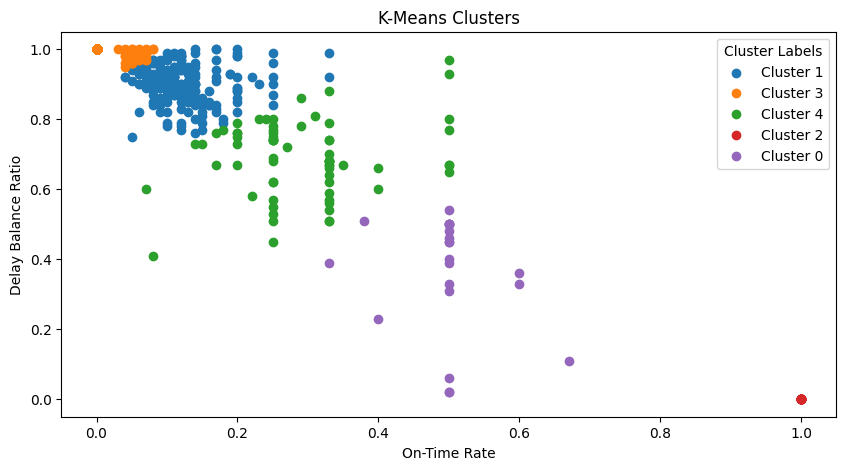

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 5))

# Plot each cluster separately and label them
for cluster_label in ceva['KMeans_Cluster'].unique():
    cluster_data = ceva[ceva['KMeans_Cluster'] == cluster_label]
    plt.scatter(cluster_data['on-time rate'], cluster_data['delay balance ratio'], label=f'Cluster {cluster_label}')

plt.title('K-Means Clusters')
plt.xlabel('On-Time Rate')
plt.ylabel('Delay Balance Ratio')
plt.legend(title='Cluster Labels')

plt.show()


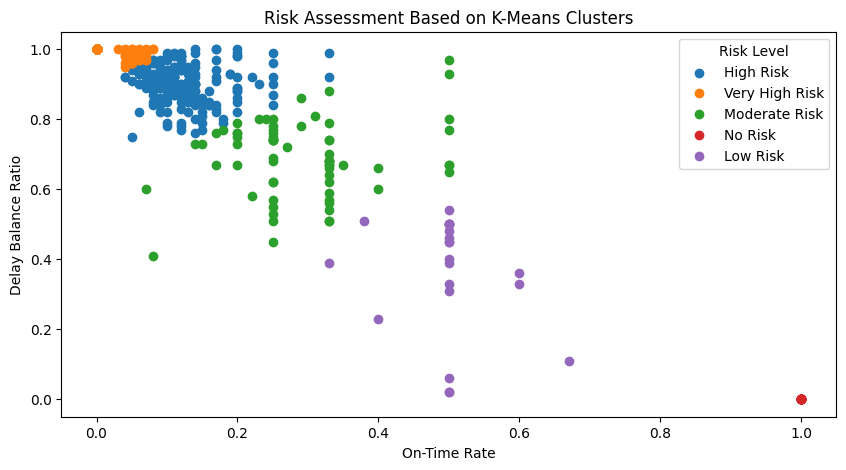

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 5))

# Plot each cluster separately and label them
for cluster_label in ceva['KMeans_Cluster'].unique():
    cluster_data = ceva[ceva['KMeans_Cluster'] == cluster_label]
    if cluster_label == 2:
        label = 'No Risk'
    elif cluster_label == 0:
        label = 'Low Risk'
    elif cluster_label == 4:
        label = 'Moderate Risk'
    elif cluster_label == 1:
        label = 'High Risk'
    elif cluster_label == 3:
        label = 'Very High Risk'
    plt.scatter(cluster_data['on-time rate'], cluster_data['delay balance ratio'], label=label)

plt.title('Risk Assessment Based on K-Means Clusters')
plt.xlabel('On-Time Rate')
plt.ylabel('Delay Balance Ratio')
plt.legend(title='Risk Level')

plt.show()


In [ ]:
ceva

,Unnamed: 0,number_of_delay_days,number_of_ontime_days,delayed_invoices_amount,ontime_invoices_amount,number_of_delayed_invoices,number_of_ontime_invoices,collateral_invoice_difference,average_collateral,number_of_invoices,average_number_of_delay_days,total_purchase,average_ontime_amount,average_delayed_amount,on-time rate,delay balance ratio,rank,customer_id,KMeans_Cluster
0,0,0.008316,0.0,0.003616,0.002628,0.009234,0.009235,0.000096,0.002151,0.009115,0.451,0.003529,0.07,0.93,0.09,0.93,4,413046,1
1,1,0.073260,0.0,0.020855,0.020138,0.071231,0.052770,0.000054,0.001992,0.069441,0.527,0.020791,0.09,0.91,0.07,0.91,4,419280,1
2,2,0.124664,0.0,0.023737,0.022973,0.121620,0.106860,0.000067,0.001999,0.120173,0.519,0.023669,0.09,0.91,0.08,0.91,4,421072,1
3,3,0.001174,0.0,0.000589,0.000166,0.001187,0.001319,0.000218,0.002100,0.001079,0.490,0.000551,0.03,0.97,0.10,0.97,4,421424,1
4,4,0.091641,0.0,0.015858,0.035542,0.091149,0.096306,0.000036,0.001988,0.091509,0.501,0.017587,0.18,0.82,0.10,0.82,4,424282,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,0.000312,0.0,0.000047,0.000000,0.000264,0.000000,0.000004,0.001939,0.000120,0.650,0.000042,0.00,1.00,0.00,1.00,5,2000000438,3
951,951,0.000000,0.0,0.000000,0.000037,0.000000,0.001319,0.000064,0.002050,0.000000,0.000,0.000003,1.00,0.00,1.00,0.00,1,2000000455,2
952,952,0.015385,0.0,0.005208,0.010668,0.015170,0.015831,0.000106,0.002063,0.015112,0.506,0.005687,0.16,0.84,0.09,0.84,4,2000000458,1
953,953,0.000887,0.0,0.000122,0.000006,0.000791,0.001319,0.000100,0.002032,0.000720,0.529,0.000111,0.00,1.00,0.14,1.00,4,2000000467,1


In [ ]:
new_df=ceva.drop(['rank', 'KMeans_Cluster', 'Unnamed: 0', 'number_of_ontime_days'], axis=1)

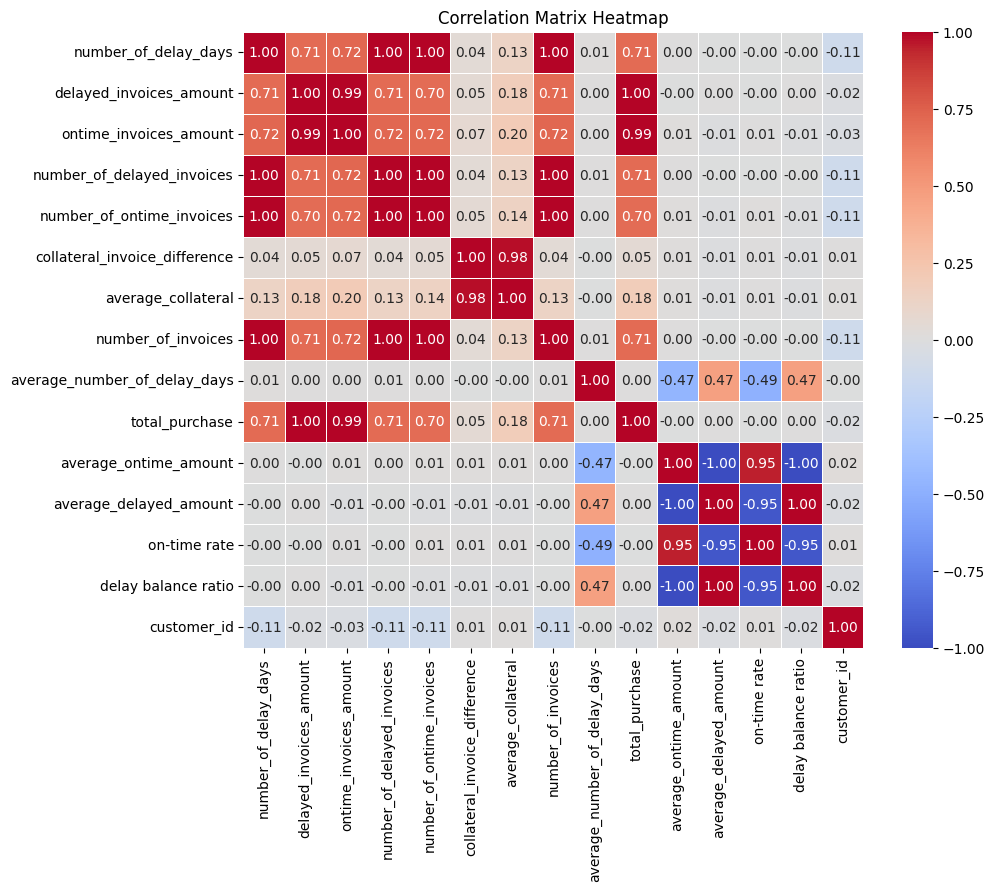

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = new_df.corr()  # Assuming 'df' is your DataFrame

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
new_df

,number_of_delay_days,delayed_invoices_amount,ontime_invoices_amount,number_of_delayed_invoices,number_of_ontime_invoices,collateral_invoice_difference,average_collateral,number_of_invoices,average_number_of_delay_days,total_purchase,average_ontime_amount,average_delayed_amount,on-time rate,delay balance ratio,customer_id
0,0.008316,0.003616,0.002628,0.009234,0.009235,0.000096,0.002151,0.009115,0.451,0.003529,0.07,0.93,0.09,0.93,413046
1,0.073260,0.020855,0.020138,0.071231,0.052770,0.000054,0.001992,0.069441,0.527,0.020791,0.09,0.91,0.07,0.91,419280
2,0.124664,0.023737,0.022973,0.121620,0.106860,0.000067,0.001999,0.120173,0.519,0.023669,0.09,0.91,0.08,0.91,421072
3,0.001174,0.000589,0.000166,0.001187,0.001319,0.000218,0.002100,0.001079,0.490,0.000551,0.03,0.97,0.10,0.97,421424
4,0.091641,0.015858,0.035542,0.091149,0.096306,0.000036,0.001988,0.091509,0.501,0.017587,0.18,0.82,0.10,0.82,424282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.000312,0.000047,0.000000,0.000264,0.000000,0.000004,0.001939,0.000120,0.650,0.000042,0.00,1.00,0.00,1.00,2000000438
951,0.000000,0.000000,0.000037,0.000000,0.001319,0.000064,0.002050,0.000000,0.000,0.000003,1.00,0.00,1.00,0.00,2000000455
952,0.015385,0.005208,0.010668,0.015170,0.015831,0.000106,0.002063,0.015112,0.506,0.005687,0.16,0.84,0.09,0.84,2000000458
953,0.000887,0.000122,0.000006,0.000791,0.001319,0.000100,0.002032,0.000720,0.529,0.000111,0.00,1.00,0.14,1.00,2000000467


In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'data' with your dataset
# Replace 'data' with the name of your DataFrame

# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                               number_of_delay_days  delayed_invoices_amount  \
number_of_delay_days                       1.000000                 0.706015   
delayed_invoices_amount                    0.706015                 1.000000   
ontime_invoices_amount                     0.722619                 0.993636   
number_of_delayed_invoices                 0.999954                 0.705882   
number_of_ontime_invoices                  0.998482                 0.697394   
collateral_invoice_difference              0.044182                 0.050133   
average_collateral                         0.132183                 0.178140   
number_of_invoices                         0.999952                 0.705215   
average_number_of_delay_days               0.008032                 0.004419   
total_purchase                             0.707820                 0.999952   
average_ontime_amount                      0.001646                -0.002368   
average_delayed_amount                  

In [ ]:
import pandas as pd

# Create a mapping dictionary
rank_mapping = {
    1: "no risk",
    2: "low risk",
    3: "moderate risk",
    4: "high risk",
    5: "very high risk"
}

# Apply the mapping to your DataFrame
ceva['categorical_rank'] = ceva['rank'].map(rank_mapping)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'categorical_rank' column
one_hot_encoded = encoder.fit_transform(ceva[['categorical_rank']])

# Create a DataFrame with the one-hot encoded values
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['categorical_rank']))

# Concatenate the one-hot DataFrame with your original DataFrame
df = pd.concat([ceva, one_hot_df], axis=1)

# Drop the original 'rank' and 'categorical_rank' columns
df.drop(['rank', 'categorical_rank'], axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df=df.drop(['delay balance ratio', 'on-time rate', 'customer_id'], axis=1)

In [ ]:
df=df.drop('KMeans_Cluster', axis=1)

In [ ]:
df

,Unnamed: 0,number_of_delay_days,number_of_ontime_days,delayed_invoices_amount,ontime_invoices_amount,number_of_delayed_invoices,number_of_ontime_invoices,collateral_invoice_difference,average_collateral,number_of_invoices,average_number_of_delay_days,total_purchase,average_ontime_amount,average_delayed_amount,categorical_rank_high risk,categorical_rank_low risk,categorical_rank_moderate risk,categorical_rank_no risk,categorical_rank_very high risk
0,0,0.008316,0.0,0.003616,0.002628,0.009234,0.009235,0.000096,0.002151,0.009115,0.451,0.003529,0.07,0.93,1.0,0.0,0.0,0.0,0.0
1,1,0.073260,0.0,0.020855,0.020138,0.071231,0.052770,0.000054,0.001992,0.069441,0.527,0.020791,0.09,0.91,1.0,0.0,0.0,0.0,0.0
2,2,0.124664,0.0,0.023737,0.022973,0.121620,0.106860,0.000067,0.001999,0.120173,0.519,0.023669,0.09,0.91,1.0,0.0,0.0,0.0,0.0
3,3,0.001174,0.0,0.000589,0.000166,0.001187,0.001319,0.000218,0.002100,0.001079,0.490,0.000551,0.03,0.97,1.0,0.0,0.0,0.0,0.0
4,4,0.091641,0.0,0.015858,0.035542,0.091149,0.096306,0.000036,0.001988,0.091509,0.501,0.017587,0.18,0.82,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,0.000312,0.0,0.000047,0.000000,0.000264,0.000000,0.000004,0.001939,0.000120,0.650,0.000042,0.00,1.00,0.0,0.0,0.0,0.0,1.0
951,951,0.000000,0.0,0.000000,0.000037,0.000000,0.001319,0.000064,0.002050,0.000000,0.000,0.000003,1.00,0.00,0.0,0.0,0.0,1.0,0.0
952,952,0.015385,0.0,0.005208,0.010668,0.015170,0.015831,0.000106,0.002063,0.015112,0.506,0.005687,0.16,0.84,1.0,0.0,0.0,0.0,0.0
953,953,0.000887,0.0,0.000122,0.000006,0.000791,0.001319,0.000100,0.002032,0.000720,0.529,0.000111,0.00,1.00,1.0,0.0,0.0,0.0,0.0


In [ ]:
ceva

,Unnamed: 0,number_of_delay_days,number_of_ontime_days,delayed_invoices_amount,ontime_invoices_amount,number_of_delayed_invoices,number_of_ontime_invoices,collateral_invoice_difference,average_collateral,number_of_invoices,average_number_of_delay_days,total_purchase,average_ontime_amount,average_delayed_amount,on-time rate,delay balance ratio,rank,customer_id,KMeans_Cluster,categorical_rank
0,0,0.008316,0.0,0.003616,0.002628,0.009234,0.009235,0.000096,0.002151,0.009115,0.451,0.003529,0.07,0.93,0.09,0.93,4,413046,1,high risk
1,1,0.073260,0.0,0.020855,0.020138,0.071231,0.052770,0.000054,0.001992,0.069441,0.527,0.020791,0.09,0.91,0.07,0.91,4,419280,1,high risk
2,2,0.124664,0.0,0.023737,0.022973,0.121620,0.106860,0.000067,0.001999,0.120173,0.519,0.023669,0.09,0.91,0.08,0.91,4,421072,1,high risk
3,3,0.001174,0.0,0.000589,0.000166,0.001187,0.001319,0.000218,0.002100,0.001079,0.490,0.000551,0.03,0.97,0.10,0.97,4,421424,1,high risk
4,4,0.091641,0.0,0.015858,0.035542,0.091149,0.096306,0.000036,0.001988,0.091509,0.501,0.017587,0.18,0.82,0.10,0.82,4,424282,1,high risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,0.000312,0.0,0.000047,0.000000,0.000264,0.000000,0.000004,0.001939,0.000120,0.650,0.000042,0.00,1.00,0.00,1.00,5,2000000438,3,very high risk
951,951,0.000000,0.0,0.000000,0.000037,0.000000,0.001319,0.000064,0.002050,0.000000,0.000,0.000003,1.00,0.00,1.00,0.00,1,2000000455,2,no risk
952,952,0.015385,0.0,0.005208,0.010668,0.015170,0.015831,0.000106,0.002063,0.015112,0.506,0.005687,0.16,0.84,0.09,0.84,4,2000000458,1,high risk
953,953,0.000887,0.0,0.000122,0.000006,0.000791,0.001319,0.000100,0.002032,0.000720,0.529,0.000111,0.00,1.00,0.14,1.00,4,2000000467,1,high risk


In [ ]:
X1 = ceva.drop(['rank', 'categorical_rank', 'KMeans_Cluster', 'Unnamed: 0', 'customer_id'], axis=1)


In [ ]:
X1

,number_of_delay_days,number_of_ontime_days,delayed_invoices_amount,ontime_invoices_amount,number_of_delayed_invoices,number_of_ontime_invoices,collateral_invoice_difference,average_collateral,number_of_invoices,average_number_of_delay_days,total_purchase,average_ontime_amount,average_delayed_amount,on-time rate,delay balance ratio
0,0.008316,0.0,0.003616,0.002628,0.009234,0.009235,0.000096,0.002151,0.009115,0.451,0.003529,0.07,0.93,0.09,0.93
1,0.073260,0.0,0.020855,0.020138,0.071231,0.052770,0.000054,0.001992,0.069441,0.527,0.020791,0.09,0.91,0.07,0.91
2,0.124664,0.0,0.023737,0.022973,0.121620,0.106860,0.000067,0.001999,0.120173,0.519,0.023669,0.09,0.91,0.08,0.91
3,0.001174,0.0,0.000589,0.000166,0.001187,0.001319,0.000218,0.002100,0.001079,0.490,0.000551,0.03,0.97,0.10,0.97
4,0.091641,0.0,0.015858,0.035542,0.091149,0.096306,0.000036,0.001988,0.091509,0.501,0.017587,0.18,0.82,0.10,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.000312,0.0,0.000047,0.000000,0.000264,0.000000,0.000004,0.001939,0.000120,0.650,0.000042,0.00,1.00,0.00,1.00
951,0.000000,0.0,0.000000,0.000037,0.000000,0.001319,0.000064,0.002050,0.000000,0.000,0.000003,1.00,0.00,1.00,0.00
952,0.015385,0.0,0.005208,0.010668,0.015170,0.015831,0.000106,0.002063,0.015112,0.506,0.005687,0.16,0.84,0.09,0.84
953,0.000887,0.0,0.000122,0.000006,0.000791,0.001319,0.000100,0.002032,0.000720,0.529,0.000111,0.00,1.00,0.14,1.00


In [ ]:
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA()

# Fit PCA on your data
pca.fit(X1)

# Calculate the cumulative explained variance ratio
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# Find the number of components to retain a certain percentage of information (e.g., 99%)
n_components = (explained_variance_ratio_cumulative < 0.99).sum() + 1

print(n_components)
pca = PCA(n_components=n_components)

# Fit and transform your data
reduced_data = pca.fit_transform(X1)
#important_features = pca.components_
reduced_data

6


array([[-0.01757787, -0.05062106, -0.00331854,  0.01202832,  0.00682827,
         0.00043581],
       [-0.01883468,  0.03104848,  0.10411078, -0.02129987,  0.05356574,
         0.01085278],
       [-0.01197892,  0.02545595,  0.18713292, -0.01657905,  0.11307834,
         0.02879128],
       ...,
       [ 0.09873059,  0.04456862,  0.00988848, -0.05703609,  0.00584595,
        -0.00270497],
       [-0.12001919, -0.00427049, -0.02018346,  0.1151332 ,  0.00684614,
         0.00398194],
       [ 0.12239226,  0.22136176, -0.0224466 ,  0.09217288,  0.00396675,
         0.00158638]])

In [ ]:
# important_features contains the top 6 principal components

# Create a DataFrame to store the contributions of original features to each component
contributions_df = pd.DataFrame(reduced_data)

# Find the absolute values of feature contributions and sort by magnitude for each component
#contributions_df = contributions_df.abs().apply(lambda row: row.sort_values(ascending=False), axis=1)

# Retrieve the top N features contributing to each component (N=6 in your case)
#top_6_contributions = contributions_df.iloc[:, :6]

#print(top_3_contributions)


In [ ]:
contributions_df

,0,1,2,3,4,5
0,-0.017578,-0.050621,-0.003319,0.012028,0.006828,0.000436
1,-0.018835,0.031048,0.104111,-0.021300,0.053566,0.010853
2,-0.011979,0.025456,0.187133,-0.016579,0.113078,0.028791
3,-0.082877,-0.031330,-0.018813,0.054418,0.003242,0.001129
4,0.134118,0.051957,0.146578,-0.068876,0.079741,0.017318
...,...,...,...,...,...,...
950,-0.217433,0.098139,-0.022091,-0.003887,-0.000842,-0.002084
951,1.883659,0.042152,-0.023220,0.065051,0.003625,-0.000813
952,0.098731,0.044569,0.009888,-0.057036,0.005846,-0.002705
953,-0.120019,-0.004270,-0.020183,0.115133,0.006846,0.003982


In [ ]:
one_hot_df

,categorical_rank_high risk,categorical_rank_low risk,categorical_rank_moderate risk,categorical_rank_no risk,categorical_rank_very high risk
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
950,0.0,0.0,0.0,0.0,1.0
951,0.0,0.0,0.0,1.0,0.0
952,1.0,0.0,0.0,0.0,0.0
953,1.0,0.0,0.0,0.0,0.0


In [ ]:
# 1. Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

X=X1
y = one_hot_df['categorical_rank_high risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# 2. Model Selection
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# 3. Model Training
nn_model.fit(X_train, y_train)

# 4. Model Evaluation
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Print the evaluation results
print("Neural Network Accuracy:", nn_accuracy)

# You can also print a classification report for more detailed metrics
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))


Neural Network Accuracy: 1.0
Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       142
         1.0       1.00      1.00      1.00        49

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



In [ ]:
# 1. Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

X=X1
y = one_hot_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# 2. Model Selection
nn_model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# 3. Model Training
nn_model.fit(X_train, y_train)

# 4. Model Evaluation
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Print the evaluation results
print("Neural Network Accuracy:", nn_accuracy)

# You can also print a classification report for more detailed metrics
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))


Neural Network Accuracy: 0.9790575916230366
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.00      0.00      0.00         4
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00       118

   micro avg       1.00      0.98      0.99       191
   macro avg       0.80      0.80      0.80       191
weighted avg       0.98      0.98      0.98       191
 samples avg       0.98      0.98      0.98       191



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

X=X1
y = one_hot_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# 2. Model Selection
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# 3. Model Training
nn_model.fit(X_train, y_train)

# 4. Model Evaluation
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Print the evaluation results
print("Neural Network Accuracy:", nn_accuracy)

# You can also print a classification report for more detailed metrics
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))


Neural Network Accuracy: 1.0
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00       118

   micro avg       1.00      1.00      1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191
 samples avg       1.00      1.00      1.00       191



In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

# Assuming nn_model is your trained Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# Perform a single cross-validation
predicted_labels = cross_val_predict(nn_model, X, y, cv=5)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9958115183246073
Precision: 0.9958911154056019
Recall: 0.9958115183246073
F1-Score: 0.9958353878716002


In [ ]:
contributions_df

,average_collateral,average_delayed_amount,average_number_of_delay_days,average_ontime_amount,collateral_invoice_difference,delay balance ratio,delayed_invoices_amount,number_of_delay_days,number_of_delayed_invoices,number_of_invoices,number_of_ontime_days,number_of_ontime_invoices,on-time rate,ontime_invoices_amount,total_purchase
0,0.244636,0.263129,0.340048,0.263129,0.225399,0.263129,0.272533,0.225733,0.226376,0.226414,2.371283e-17,0.226454,0.379190,0.263307,0.271787
1,0.052057,0.126229,0.777008,0.126229,0.054691,0.126229,0.033283,0.009014,0.009722,0.009628,4.385526e-17,0.008699,0.582990,0.019944,0.032074
2,0.568080,0.038571,0.017291,0.038571,0.612240,0.038571,0.150775,0.235856,0.236611,0.235224,3.930327e-17,0.221048,0.068322,0.176263,0.153003


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

X = contributions_df
y = one_hot_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# 2. Model Selection
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# 3. Model Training
nn_model.fit(X_train, y_train)

# 4. Model Evaluation
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Print the evaluation results
print("Neural Network Accuracy:", nn_accuracy)

# You can also print a classification report for more detailed metrics
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))



Neural Network Accuracy: 0.9685863874345549
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       1.00      0.75      0.86         4
           2       0.88      0.93      0.90        15
           3       1.00      1.00      1.00         5
           4       0.99      0.98      0.99       118

   micro avg       0.97      0.97      0.97       191
   macro avg       0.96      0.93      0.94       191
weighted avg       0.97      0.97      0.97       191
 samples avg       0.97      0.97      0.97       191



In [ ]:
# 2. Model Selection
from sklearn.metrics import precision_recall_fscore_support
X = X1
y = one_hot_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Model Training
rf_model.fit(X_train, y_train)

# 4. Model Evaluation
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, rf_pred, average='weighted')

# Print the evaluation results
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", precision)
print("Random Forest Recall:", recall)
print("Random Forest f1_score:", f1_score)




Random Forest Accuracy: 0.9790575916230366
Random Forest Precision: 0.9795897819458029
Random Forest Recall: 0.9790575916230366
Random Forest f1_score: 0.9786349428613165


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

# Assuming rf_model is your trained Neural Network model


# Perform a single cross-validation
predicted_labels = cross_val_predict(rf_model, X, y, cv=5)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9790575916230366
Precision: 0.9810161966786394
Recall: 0.9790575916230366
F1-Score: 0.9800002808760745


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order and associate them with feature names
importance_sorted = list(zip(X.columns, feature_importances))
importance_sorted.sort(key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in importance_sorted:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: on-time rate, Importance: 0.21387029979573158
Feature: delay balance ratio, Importance: 0.17305218095800126
Feature: average_delayed_amount, Importance: 0.16794590304486479
Feature: average_ontime_amount, Importance: 0.13620657423432037
Feature: ontime_invoices_amount, Importance: 0.06388145927042356
Feature: number_of_ontime_invoices, Importance: 0.05542490161348292
Feature: number_of_invoices, Importance: 0.05064693992032954
Feature: number_of_delay_days, Importance: 0.0437414648072434
Feature: number_of_delayed_invoices, Importance: 0.0386413383707928
Feature: average_number_of_delay_days, Importance: 0.016811079007806293
Feature: delayed_invoices_amount, Importance: 0.016254437982517043
Feature: total_purchase, Importance: 0.012634856536133736
Feature: average_collateral, Importance: 0.005568106225088695
Feature: collateral_invoice_difference, Importance: 0.005320458233264086
Feature: number_of_ontime_days, Importance: 0.0


In [ ]:
# 2. Model Selection
X = X1
y = one_hot_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = XGBClassifier()

# 3. Model Training
xgb_model.fit(X_train, y_train)

# 4. Model Evaluation
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
# Assuming xgb_model is your trained XGBoost model


# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, xgb_pred, average='weighted')

print("XGBoost Precision:", precision)
print("XGBoost Recall:", recall)
print("XGBoost F1-Score:", f1_score)

# Print the evaluation results
print("XGBoost Accuracy:", xgb_accuracy)


XGBoost Precision: 0.9825987624940505
XGBoost Recall: 0.9581151832460733
XGBoost F1-Score: 0.9684819728932461
XGBoost Accuracy: 0.9581151832460733


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier

# Assuming rf_model is your trained Neural Network model


# Perform a single cross-validation
predicted_labels = cross_val_predict(xgb_model, X, y, cv=5)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y, predicted_labels)
precision = precision_score(y, predicted_labels, average='weighted')
recall = recall_score(y, predicted_labels, average='weighted')
f1 = f1_score(y, predicted_labels, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9759162303664921
Precision: 0.9842005189138138
Recall: 0.9780104712041885
F1-Score: 0.9809629016465384


In [ ]:
from xgboost import XGBClassifier

# Create and fit an XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Sort feature importances in descending order and associate them with feature names
importance_sorted = list(zip(X.columns, feature_importances))
importance_sorted.sort(key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in importance_sorted:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: on-time rate, Importance: 0.42658254504203796
Feature: number_of_delay_days, Importance: 0.2722987234592438
Feature: average_ontime_amount, Importance: 0.18446719646453857
Feature: number_of_delayed_invoices, Importance: 0.04113493859767914
Feature: ontime_invoices_amount, Importance: 0.04001414403319359
Feature: delayed_invoices_amount, Importance: 0.012077446095645428
Feature: average_number_of_delay_days, Importance: 0.00694806594401598
Feature: collateral_invoice_difference, Importance: 0.004222219344228506
Feature: number_of_invoices, Importance: 0.0037548604886978865
Feature: number_of_ontime_invoices, Importance: 0.0035429727286100388
Feature: average_collateral, Importance: 0.0029619436245411634
Feature: total_purchase, Importance: 0.001994962338358164
Feature: number_of_ontime_days, Importance: 0.0
Feature: average_delayed_amount, Importance: 0.0
Feature: delay balance ratio, Importance: 0.0


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.3 MB/s eta 0:00:00


 98%|===================| 1881/1910 [00:12<00:00]       

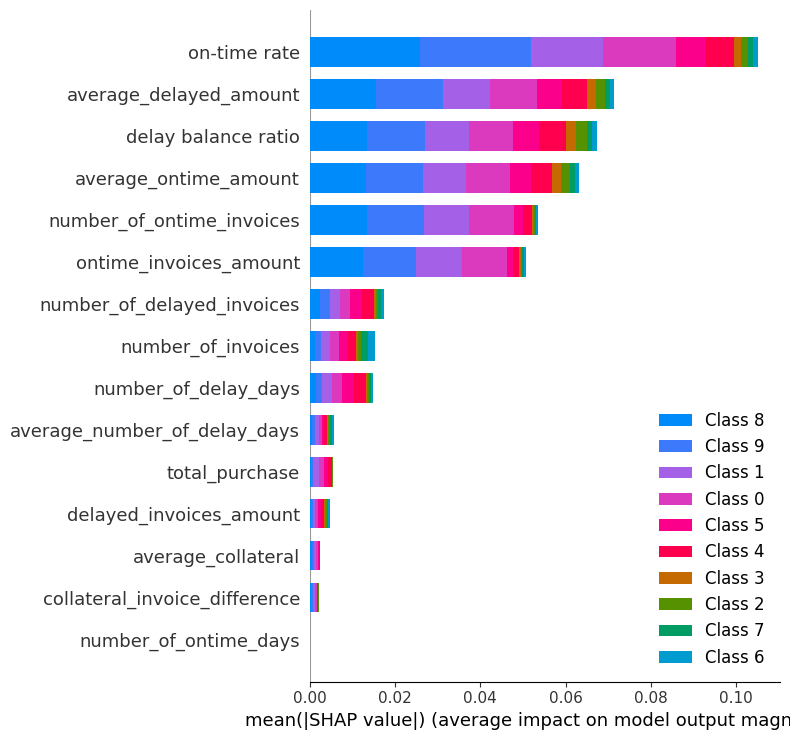

In [ ]:
import shap

# Explain the Random Forest model
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Explain the XGBoost model
#explainer = shap.Explainer(xgb_model, X_train)
#shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for a specific prediction
shap.summary_plot(shap_values, X_test)


In [ ]:
import shap


# Explain the XGBoost model
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for a specific prediction
shap.summary_plot(shap_values, X_test)


ModuleNotFoundError: ignored

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer (replace 'model' with your actual model)
explainer = shap.Explainer(rf_model, X_train)

# Choose a data point (e.g., the first data point)
data_point = X_test.iloc[0]

# Calculate SHAP values for the chosen data point
shap_values = explainer.shap_values(data_point)

# Create a SHAP Force Plot
shap.force_plot(explainer.expected_value[0], shap_values[0], data_point, show=True)


In [ ]:
# Choose a feature you want to analyze (e.g., 'collateral_value')
feature_name = 'average_collateral'

# Create a SHAP Dependency Plot
shap.dependence_plot(feature_name, shap_values[0], X_test, show=True)
# Choose a feature you want to analyze (e.g., 'collateral_value')




TypeError: ignored

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# Define your input layer
input_layer = Input(shape=(original_dimension,))

# Define your autoencoder model
encoded = Dense(encoding_dimension, activation='relu')(input_layer)
decoded = Dense(original_dimension, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder using your data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True)

# Now you can use the encoder part of the autoencoder to obtain reduced dimensionality
encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X)

# X_encoded contains the encoded features


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load your dataset as a pandas DataFrame
data = pd.read_csv('your_dataset.csv')

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Initialize LDA and specify the number of components
n_components = 2  # You can choose the number of components
lda = LinearDiscriminantAnalysis(n_components=n_components)

# Fit and transform your data
X_lda = lda.fit_transform(X, y)

# Now X_lda contains the LDA-transformed features


In [ ]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
csv_file = '/content/drive/MyDrive/ranked_customer_original.csv'
ceva = pd.read_csv(csv_file)
ceva.head(5)

,Unnamed: 0,customer_id,number_of_delay_days,number_of_ontime_days,delayed_invoices_amount,ontime_invoices_amount,number_of_delayed_invoices,number_of_ontime_invoices,collateral_invoice_difference,average_collateral,number_of_invoices,average_number_of_delay_days,total_purchase,average_ontime_amount,average_delayed_amount,on-time rate,delay balance ratio,rank
0,0,413046,347,0,151144.58,10580.39,70,7,5438.58,7029.54,77,4.51,161724.97,0.07,0.93,0.09,0.93,4
1,1,419280,3057,0,871654.89,81066.43,540,40,3057.79,1579.51,580,5.27,952721.32,0.09,0.91,0.07,0.91,4
2,2,421072,5202,0,992100.05,92479.00,922,81,3787.99,1806.04,1003,5.19,1084579.05,0.09,0.91,0.08,0.91,4
3,3,421424,49,0,24634.98,667.51,9,1,12395.35,5285.84,10,4.90,25302.49,0.03,0.97,0.10,0.97,4
4,4,424282,3824,0,662816.05,143073.94,691,73,2076.53,1415.73,764,5.01,805889.99,0.18,0.82,0.10,0.82,4


In [ ]:
new_df_original=ceva.drop(['rank','customer_id','delay balance ratio','on-time rate', 'Unnamed: 0', 'number_of_ontime_days'], axis=1)

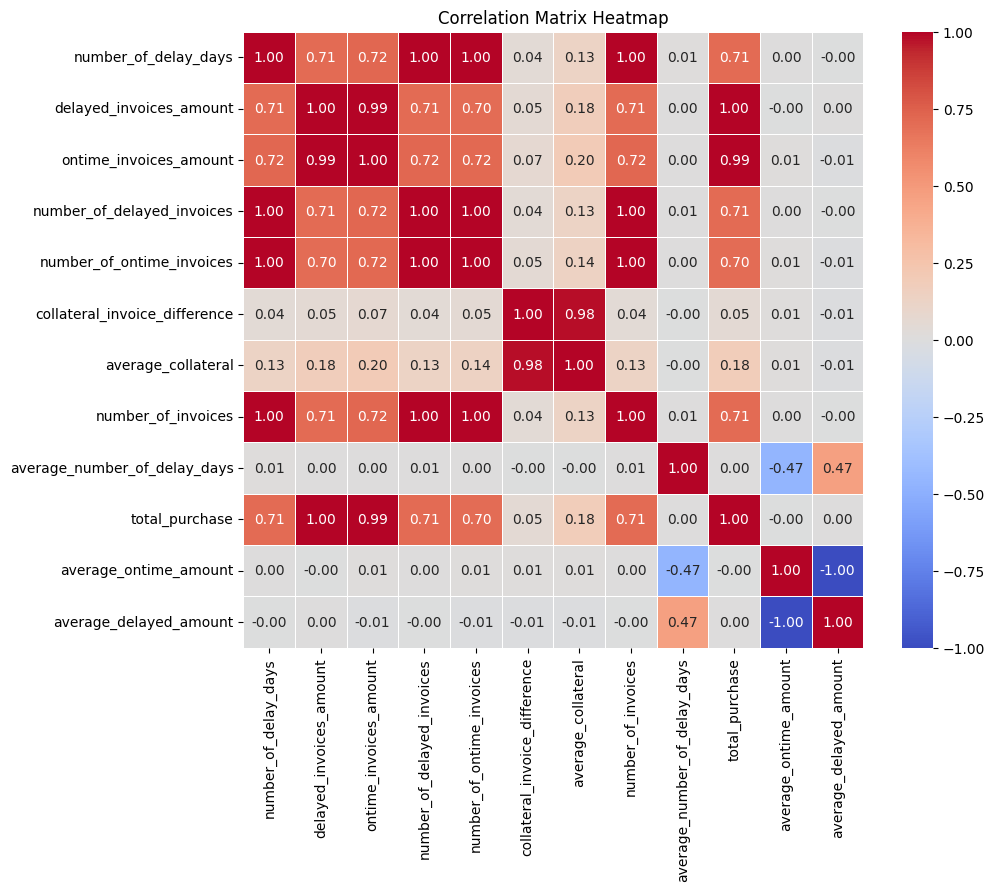

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = new_df_original.corr()  # Assuming 'df' is your DataFrame

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
